# Biodiversity

Author: Rony Guerra

Date: 8-12-2022

<img src="national_park.jpg" width="800" height="400">

#### Question to Answer:
1. What is the distribution of conservation_status for animals?

2. Are certain types of species more likely to be endangered?

3. Are the differences between species and their conservation status significant?

4. Which national park has the most species sightings?

5. Which species were spotted the most at each park?

The data for this project is inspired by real data but its mostly fictional.

Part of the Codecademy Data Science Career Path at codecademy.com

#### Import Module

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from IPython.display import Image

#### Observation Data

In [2]:
obs_df = pd.read_csv('observations.csv')

In [3]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### clean observation dataset

In [4]:
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


There are four national parks in the observation dataset.

In [5]:
obs_df.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [6]:
obs_df.park_name.nunique()

4

There are 5541 different species in the observation dataset.

In [7]:
obs_df.scientific_name.nunique()

5541

check for any missing values

In [10]:
obs_df.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

There are 15 duplicates in the observation dataframe.

In [11]:
obs_df.duplicated().sum() # count duplicate in the observation dataframe

15

In [12]:
obs_df.drop_duplicates(inplace=True) # drop duplicate rows

#### Species info Data

In [13]:
sp_df = pd.read_csv('species_info.csv', encoding = 'unicode_escape')

In [14]:
sp_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Clean species info dataset

In [15]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [16]:
sp_df.scientific_name.nunique()

5541

In [17]:
sp_df.isna().sum() # check for missing values

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

There are four different types of conservation status.

In [18]:
sp_df.conservation_status.unique() # unique values in conservation status column

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

There are 7 different type of category species.

In [19]:
sp_df.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

I replaced missing values to "No Intervention" in the conservation status column.

In [20]:
sp_df["conservation_status"].fillna("No Intervention", inplace = True) # fill na values to no intervention

In [21]:
sp_df.duplicated().sum() # count duplicate in the species info dataframe

0

## Task#1.What is the distribution of conservation_status for animals?

In [22]:
sp_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [23]:
sp_df['count'] = 1
status = sp_df.groupby('conservation_status').sum().reset_index()[['conservation_status','count']]
status_sort = status.sort_values(by='count',ascending=True)

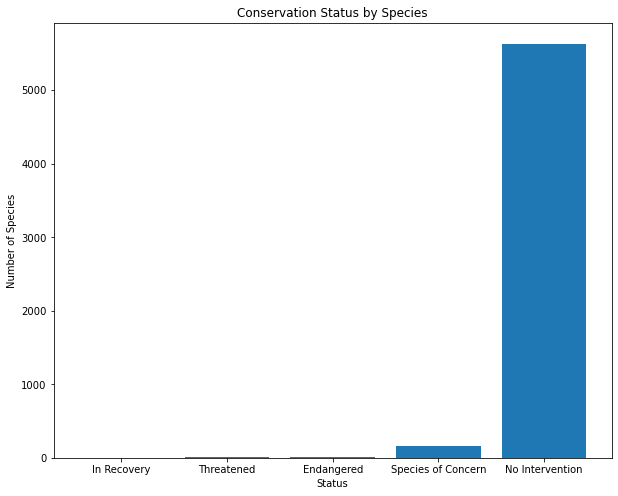

In [24]:
x = status_sort['conservation_status']
y = status_sort['count']
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(x, y)
plt.title('Conservation Status by Species')
plt.xlabel('Status')
plt.ylabel('Number of Species')
plt.show()

## Task#2.Are certain types of species more likely to be endangered?

In [25]:
sp_df.head()

,category,scientific_name,common_names,conservation_status,count
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,1
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,1
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,1
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,1
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,1


In [26]:
sp_df.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [27]:
sp_df['is_protected'] = sp_df['conservation_status'] != 'No Intervention'

In [28]:
sp_df.is_protected.unique()

array([False,  True])

In [29]:
categoryStatus = sp_df.groupby(['category','is_protected']).count()['scientific_name'].reset_index()
categoryStatus

,category,is_protected,scientific_name
0,Amphibian,False,73
1,Amphibian,True,7
2,Bird,False,442
3,Bird,True,79
4,Fish,False,116
5,Fish,True,11
6,Mammal,False,176
7,Mammal,True,38
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [30]:
pivot_category = categoryStatus.pivot(values = 'scientific_name', index='category', columns = 'is_protected').reset_index()
pivot_category

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [31]:
pivot_category.columns = ['category', 'not_protected', 'is_protected']

In [32]:
pivot_category

,category,not_protected,is_protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [33]:
 pivot_category['percent_protected'] = pivot_category['is_protected'] / (pivot_category['not_protected'] + pivot_category['is_protected'])*100

In [34]:
pivot_category

,category,not_protected,is_protected,percent_protected
0,Amphibian,73,7,8.750000
1,Bird,442,79,15.163148
2,Fish,116,11,8.661417
3,Mammal,176,38,17.757009
4,Nonvascular Plant,328,5,1.501502
5,Reptile,74,5,6.329114
6,Vascular Plant,4424,46,1.029083


In [35]:
protected_sort = pivot_category.sort_values(by='percent_protected')

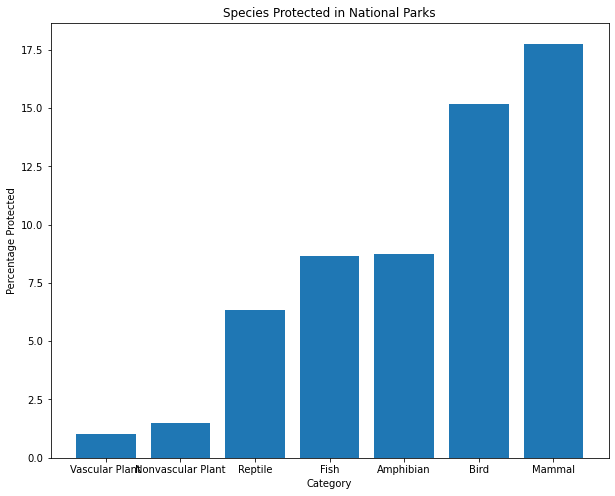

In [36]:
x = protected_sort['category']
y = protected_sort['percent_protected']
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(x,y)
plt.title('Species Protected in National Parks')
plt.xlabel('Category')
plt.ylabel('Percentage Protected')
plt.show()

## Task#3.Are the differences between species and their conservation status significant?

In [37]:
contingency = [[38, 176],
              [79, 442]]

In [38]:
chi2_contingency(contingency)

(0.5810483277947567,
 0.445901703047197,
 1,
 array([[ 34.06530612, 179.93469388],
        [ 82.93469388, 438.06530612]]))

In [39]:
contingency = [[38, 176],
               [5, 74]]
chi2_contingency(contingency)

(5.139702724228909,
 0.02338465214871547,
 1,
 array([[ 31.40614334, 182.59385666],
        [ 11.59385666,  67.40614334]]))

## Task#4.Which national park has the most species sightings?

In [40]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [41]:
sp_df.head()

,category,scientific_name,common_names,conservation_status,count,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,1,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,1,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,1,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,1,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,1,False


In [42]:
park_obs = obs_df.groupby(['park_name']).sum()['observations'].reset_index()
park_obs_sort = park_obs.sort_values(by='observations')

In [43]:
park_obs_sort

,park_name,observations
1,Great Smoky Mountains National Park,431378
0,Bryce National Park,575901
3,Yosemite National Park,862836
2,Yellowstone National Park,1442314


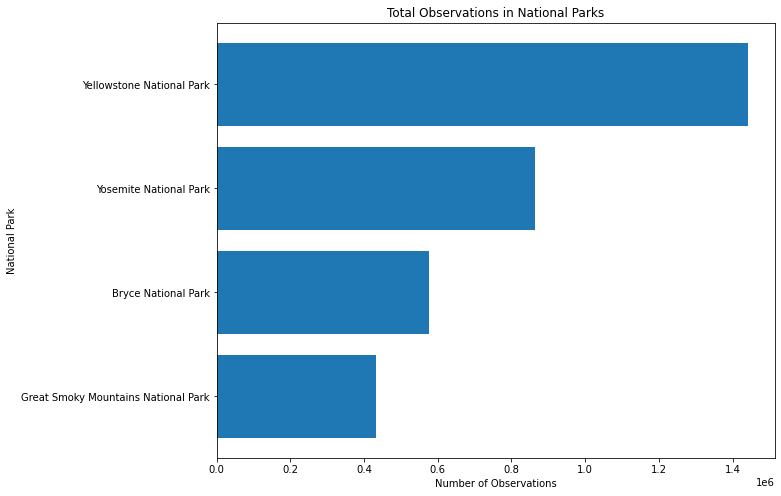

In [44]:
x = park_obs_sort['park_name']
y = park_obs_sort['observations']
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.barh(x,y)
plt.title('Total Observations in National Parks')
plt.xlabel('Number of Observations')
plt.ylabel('National Park')
plt.show()

## Task#5.Which species were spotted the most at each park?

In [45]:
def xlookup(lookup_value, lookup_array, return_array, if_not_found:str = ''):
    match_value = return_array.loc[lookup_array == lookup_value]
    if match_value.empty:
        return f'"{lookup_value}" not found!' if if_not_found == '' else if_not_found

    else:
        return match_value.tolist()[0]

In [46]:
obs_df['category'] = obs_df['scientific_name'].apply(xlookup, args = (sp_df['scientific_name'], sp_df['category']))

In [47]:
obs_df.head()

,scientific_name,park_name,observations,category
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant


In [48]:
species_spotted_per_park = obs_df.groupby(['park_name','category']).sum()['observations'].reset_index()

In [49]:
species_spotted_per_park

,park_name,category,observations
0,Bryce National Park,Amphibian,7380
1,Bryce National Park,Bird,51647
2,Bryce National Park,Fish,12423
3,Bryce National Park,Mammal,20550
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,7950
6,Bryce National Park,Vascular Plant,442959
7,Great Smoky Mountains National Park,Amphibian,5707
8,Great Smoky Mountains National Park,Bird,37728
9,Great Smoky Mountains National Park,Fish,9206


Vascular Plant were spotted the most at each national parks